#Question 1: QDA

##Subpart 1: Preprocessing and Visualization

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
import matplotlib
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/iris_data.csv')
print(data.head())
print(data.info())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: class, dtype: float64


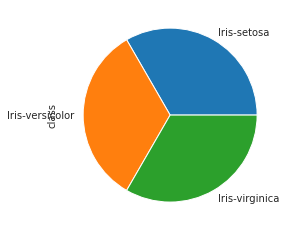

In [188]:
##since no missing values as such; no need to perform any particular data preprocessing
print(data['class'].value_counts()/len(data))
fig,ax=plt.subplots() 
data['class'].value_counts().plot(ax=ax,kind='pie')
plt.show()



Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: class, dtype: float64


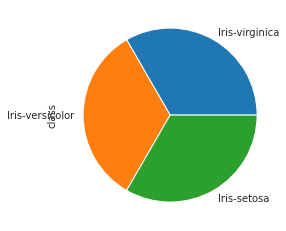

In [189]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(data, data["class"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


print(strat_test_set["class"].value_counts() / len(strat_test_set))
##This procedure reduces sampling bais

fig,ax=plt.subplots() 
strat_test_set["class"].value_counts().plot(ax=ax,kind='pie')
plt.show()

train, test= strat_train_set, strat_test_set

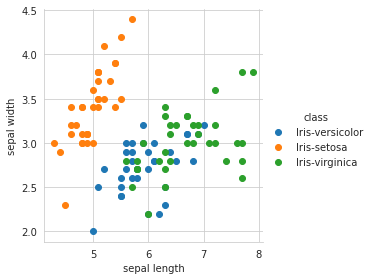

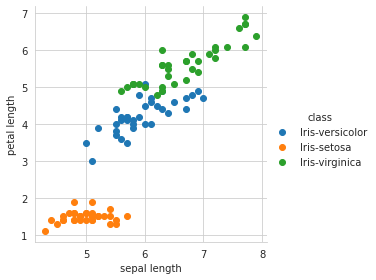

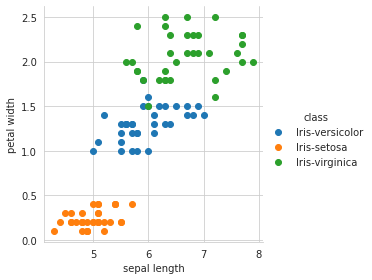

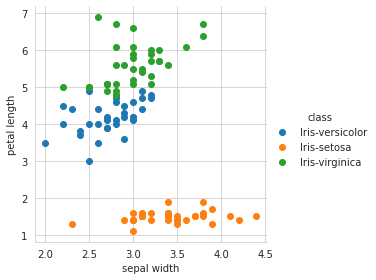

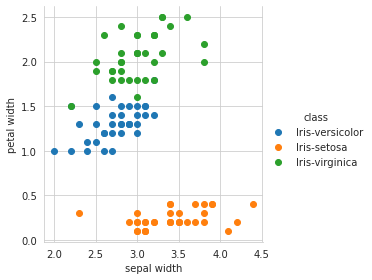

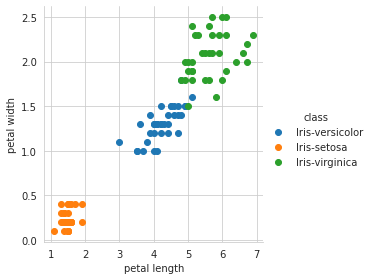

In [190]:
import seaborn as sns

sns.set_style("whitegrid")
 
features= list(data.columns)
features.remove('class')
l= len(features)

for i in range(l- 1):
  for j in range(i+1, l):
    sns.FacetGrid(train, hue ="class",
              height = 4).map(plt.scatter,
                              features[i], features[j]).add_legend()


##Subpart B, C, D: Training, Reporting and Plotting

In [191]:
'''we get best decision boundaries with 
> petal length vs petal width;
> petal length vs sepal length;
> petal width vs sepal length;

therefore our selection of top 3 features will be
petal length, sepal length, petal width'''

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X=train.copy().drop(['sepal width', 'class'], axis=1)
X_test= test.copy().drop(['sepal width', 'class'], axis=1)
y=train['class']
y_test= test['class']

qda = QDA(store_covariance=True)
features=['petal length', 'petal width', 'sepal length']
for i in features:
  view= X.copy().drop([i], axis=1)
  qda.fit(view, y)
  print(f'for features: ',list(view.columns))
  print(qda.means_, '\n\n', qda.covariance_[0], '\n\n', qda.covariance_[2], '\n\n', qda.covariance_[2], '\n\n')


  #from the demo

  


for features:  ['sepal length', 'petal width']
[[4.98857143 0.23714286]
 [5.94857143 1.30857143]
 [6.68285714 2.06857143]] 

 [[0.10633613 0.01308403]
 [0.01308403 0.01005042]] 

 [[0.43734454 0.0347395 ]
 [0.0347395  0.0657479 ]] 

 [[0.43734454 0.0347395 ]
 [0.0347395  0.0657479 ]] 


for features:  ['sepal length', 'petal length']
[[4.98857143 1.48857143]
 [5.94857143 4.23714286]
 [6.68285714 5.63142857]] 

 [[0.10633613 0.00868908]
 [0.00868908 0.02339496]] 

 [[0.43734454 0.33584874]
 [0.33584874 0.33221849]] 

 [[0.43734454 0.33584874]
 [0.33584874 0.33221849]] 


for features:  ['petal length', 'petal width']
[[1.48857143 0.23714286]
 [4.23714286 1.30857143]
 [5.63142857 2.06857143]] 

 [[0.02339496 0.00337815]
 [0.00337815 0.01005042]] 

 [[0.33221849 0.0492521 ]
 [0.0492521  0.0657479 ]] 

 [[0.33221849 0.0492521 ]
 [0.0492521  0.0657479 ]] 




for features:  ['sepal length', 'petal width']


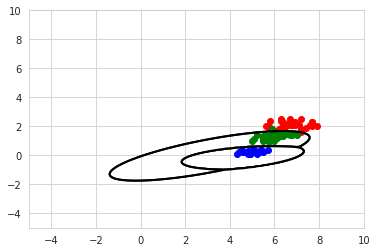

for features:  ['sepal length', 'petal length']


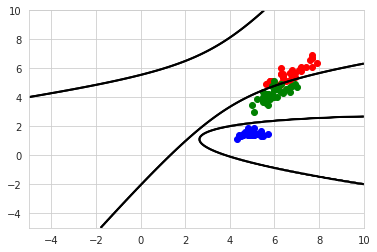

for features:  ['petal length', 'petal width']


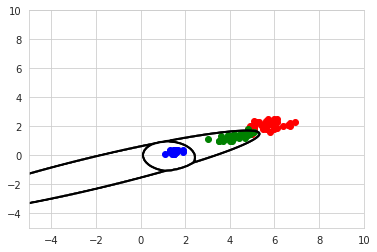

In [192]:
import warnings
warnings.filterwarnings('ignore')


for i in features:
  view= X.copy().drop([i], axis=1)
  qda.fit(view, y)
  print(f'for features: ',list(view.columns))


  splot = plt.figure()
  splot = plt.subplot(1, 1, 1)

  splot.scatter(view[y=='Iris-setosa'].iloc[:,0], view[y=='Iris-setosa'].iloc[:,1], c='b', label='0')
  splot.scatter(view[y=='Iris-virginica'].iloc[:,0], view[y=='Iris-virginica'].iloc[:,1], c='r', label='0')
  splot.scatter(view[y=='Iris-versicolor'].iloc[:,0], view[y=='Iris-versicolor'].iloc[:,1], c='g', label='0')



  xx, yy = np.meshgrid(np.linspace(-5, 10, 200), np.linspace(-5, 10, 200))
  X_grid = np.c_[xx.ravel(), yy.ravel()]
  probabilities_qda = qda.predict_proba(X_grid)[:,0].reshape(xx.shape)
  probabilities_qda1 = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)
  probabilities_qda2= qda.predict_proba(X_grid)[:,2].reshape(xx.shape)



  plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
  plt.contour(xx, yy, probabilities_qda1, [0.5], linewidths=2., colors='k')
  plt.contour(xx, yy, probabilities_qda2, [0.5], linewidths=2., colors='k')
  plt.show()

  #from the demo

  

##Subpart E: Testing

In [193]:
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')


for i in features:
  view= X.copy().drop([i], axis=1)
  test_view= X_test.copy().drop([i], axis=1)
  qda.fit(view, y)
  print(f'for features: ',list(view.columns))
  pred= qda.predict(test_view)
  print(accuracy_score(y_test, pred))

  #from the demo

for features:  ['sepal length', 'petal width']
0.9333333333333333
for features:  ['sepal length', 'petal length']
0.9555555555555556
for features:  ['petal length', 'petal width']
0.9333333333333333


##Subpart F, G and H:training LDA, plotting boundary and reporting accuracy rate

In [182]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='eigen',shrinkage= 'auto')
lda.fit(X.drop(['sepal length'],axis=1), y)
pred= lda.predict(X_test.drop(['sepal length'], axis=1))
print('accuracy score with LDA for best pair of features: ', accuracy_score(y_test, pred))

accuracy score with LDA for best pair of features:  0.9111111111111111


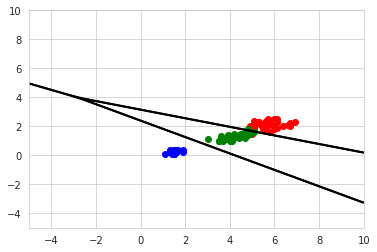

In [183]:

splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(view[y=='Iris-setosa'].iloc[:,0], view[y=='Iris-setosa'].iloc[:,1], c='b', label='0')
splot.scatter(view[y=='Iris-virginica'].iloc[:,0], view[y=='Iris-virginica'].iloc[:,1], c='r', label='0')
splot.scatter(view[y=='Iris-versicolor'].iloc[:,0], view[y=='Iris-versicolor'].iloc[:,1], c='g', label='0')



xx, yy = np.meshgrid(np.linspace(-5, 10, 200), np.linspace(-5, 10, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_lda = lda.predict_proba(X_grid)[:,0].reshape(xx.shape)
probabilities_lda1 = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
probabilities_lda2= lda.predict_proba(X_grid)[:,2].reshape(xx.shape)



plt.contour(xx, yy, probabilities_lda, [0.5], linewidths=2., colors='k')
plt.contour(xx, yy, probabilities_lda1, [0.5], linewidths=2., colors='k')
plt.contour(xx, yy, probabilities_lda2, [0.5], linewidths=2., colors='k')
plt.show()

##Subpart I: plotting gaussian distributons

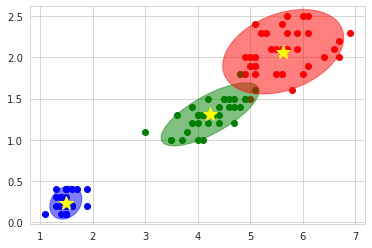

In [184]:
view2= X.copy().drop(['sepal length'], axis=1)
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(view2[y=='Iris-setosa'].iloc[:,0], view2[y=='Iris-setosa'].iloc[:,1], c='b', label='0')
splot.scatter(view2[y=='Iris-virginica'].iloc[:,0], view2[y=='Iris-virginica'].iloc[:,1], c='r', label='0')
splot.scatter(view2[y=='Iris-versicolor'].iloc[:,0], view2[y=='Iris-versicolor'].iloc[:,1], c='g', label='0')

plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'g')
plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'r')


plt.show()


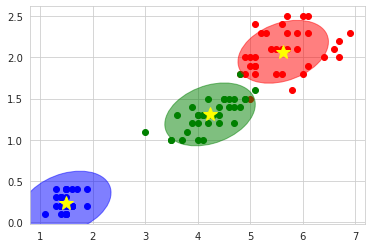

In [185]:
view2= X.copy().drop(['sepal length'], axis=1)
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(view2[y=='Iris-setosa'].iloc[:,0], view2[y=='Iris-setosa'].iloc[:,1], c='b', label='0')
splot.scatter(view2[y=='Iris-virginica'].iloc[:,0], view2[y=='Iris-virginica'].iloc[:,1], c='r', label='0')
splot.scatter(view2[y=='Iris-versicolor'].iloc[:,0], view2[y=='Iris-versicolor'].iloc[:,1], c='g', label='0')

plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'g')
plot_ellipse(splot, lda.means_[2], lda.covariance_, 'r')


plt.show()

#Question 2

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/iris_data.csv')
data=data.drop(['sepal length', 'sepal width'], axis=1)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["class"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


train, test= strat_train_set, strat_test_set

##Subpart A: calculation and viz

In [ ]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [195]:


mean1= [np.mean(X_train[y_train=='Iris-setosa']['petal length']), 
        np.mean(X_train[y_train=='Iris-setosa']['petal width'])]
mean2= [np.mean(X_train[y_train=='Iris-versicolor']['petal length']), 
        np.mean(X_train[y_train=='Iris-versicolor']['petal width'])]
mean3= [np.mean(X_train[y_train=='Iris-virginica']['petal length']), 
        np.mean(X_train[y_train=='Iris-virginica']['petal width'])]
# print(mean1, mean2, mean3)

cov1= pd.DataFrame.cov(X_train[y_train=='Iris-setosa'])
cov2= pd.DataFrame.cov(X_train[y_train=='Iris-versicolor'])
cov3= pd.DataFrame.cov(X_train[y_train=='Iris-virginica'])
print('mean of class 1', mean1)
print('mean of class 2', mean2)
print('mean of class 3', mean3)
print('\n covariance of class 1', cov1)

print('\n covariance of class 2', cov2)

print('\n covariance of class 3', cov3)

mean of class 1 [1.48, 0.25249999999999984]
mean of class 2 [4.2524999999999995, 1.3199999999999998]
mean of class 3 [5.58, 2.0399999999999987]

 covariance of class 1               petal length  petal width
petal length      0.025744     0.005692
petal width       0.005692     0.013840

 covariance of class 2               petal length  petal width
petal length      0.196404     0.060462
petal width       0.060462     0.034974

 covariance of class 3               petal length  petal width
petal length      0.331897     0.058769
petal width       0.058769     0.072205


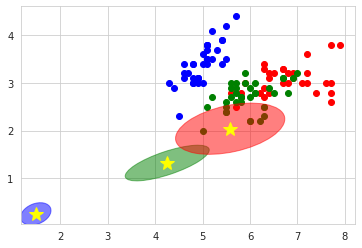

In [197]:
view2= train.copy()
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

splot=plt.figure()
splot = plt.subplot(1, 1, 1)

plt.scatter(view2[y_train=='Iris-setosa'].iloc[:,0], view2[y_train=='Iris-setosa'].iloc[:,1], c='b', label='0')
plt.scatter(view2[y_train=='Iris-virginica'].iloc[:,0], view2[y_train=='Iris-virginica'].iloc[:,1], c='r', label='0')
plt.scatter(view2[y_train=='Iris-versicolor'].iloc[:,0], view2[y_train=='Iris-versicolor'].iloc[:,1], c='g', label='0')

plot_ellipse(splot, mean1, cov1, 'b')
plot_ellipse(splot, mean2, cov2, 'g')
plot_ellipse(splot, mean3, cov3, 'r')

plt.show()

##Subpart B: Compute Likelihood

In [ ]:
import math
def like(mean, cov, x):
  x=np.subtract(x, mean)
  x=-0.5*x@np.linalg.pinv(cov)@(x.T)
  likelihood= (1/(2*np.pi)**(0.5*2)) *(1/(np.linalg.det(cov)))*math.exp(x)
  return likelihood

print('for class 1', like(mean1, cov1, np.array(X_train.iloc[0, :])))
  

for class 1 413.5553367254514


##Subpart C: MLE

In a random sampling of 𝑁 observation vectors 𝒙𝟏 , 𝒙𝟐, … , 𝒙𝑵 from 𝑁𝑝 (𝜇, 𝛴), the sample mean vector 𝑥̅= 1 𝑁 ∑ 𝑥𝛼 𝑁 𝛼=1 is the maximum likelihood estimator of 𝜇 and 𝛴̂ = 1 𝑁 ∑ (𝑥𝛼 − 𝑥̅)(𝑥𝛼 − 𝑥̅)′ 𝑁 𝛼=1 is the maximum likelihood estimator of 𝛴.

Reference: https://www.bbau.ac.in/dept/Statistics/TM/Estimation%20of%20Mean%20Vector%20and%20Variance%20Covariance%20Matrix.pdf

In [200]:

def mle(X_train, y_train):
  mle_mean1=np.mean(X_train[y_train=='Iris-setosa'], axis=0)
  mle_mean2=np.mean(X_train[y_train=='Iris-versicolor'], axis=0)
  mle_mean3=np.mean(X_train[y_train=='Iris-virginica'], axis=0)

  mle_cov1, mle_cov2, mle_cov3= np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2))

  for i in range(len(X_train[y_train=='Iris-setosa'])):
    x_alpha= np.array(np.array(X_train[y_train=='Iris-setosa'].iloc[i, :])-np.array(mle_mean1))
    x_alpha= np.array([x_alpha])

    sigma= np.matmul( np.transpose(x_alpha), x_alpha)
    mle_cov1+=sigma
  mle_cov1/=len(X_train[y_train=='Iris-setosa'])

  for i in range(len(X_train[y_train=='Iris-versicolor'])):
    x_alpha= np.array(np.array(X_train[y_train=='Iris-versicolor'].iloc[i, :])-np.array(mle_mean2))
    x_alpha= np.array([x_alpha])

    sigma= np.matmul( np.transpose(x_alpha), x_alpha)
    mle_cov2+=sigma
  mle_cov2/=len(X_train[y_train=='Iris-versicolor'])

  for i in range(len(X_train[y_train=='Iris-virginica'])):
    x_alpha= np.array(np.array(X_train[y_train=='Iris-virginica'].iloc[i, :])-np.array(mle_mean3))
    x_alpha= np.array([x_alpha])

    sigma= np.matmul( np.transpose(x_alpha), x_alpha)
    mle_cov3+=sigma
  mle_cov3/=len(X_train[y_train=='Iris-virginica'])    



  res= [[mle_mean1, mle_cov1],[mle_mean2, mle_cov2], [mle_mean3, mle_cov3] ]
  return res

res= mle(X_train, y_train)
mle_m1, mle_c1, mle_m2, mle_c2, mle_m3, mle_c3= res[0][0], res[0][1], res[1][0], res[1][1], res[2][0], res[2][1]


print('mean of class 1\n\n', mle_m1)
print('mean of class 2\n\n', mle_m2)
print('mean of class 3\n\n', mle_m3)
print('\n covariance of class 1\n\n',mle_c1)

print('\n covariance of class 2\n\n', mle_c2)

print('\n covariance of class 3\n\n', mle_c3)


mean of class 1

 petal length    1.4800
petal width     0.2525
dtype: float64
mean of class 2

 petal length    4.2525
petal width     1.3200
dtype: float64
mean of class 3

 petal length    5.58
petal width     2.04
dtype: float64

 covariance of class 1

 [[0.0251     0.00555   ]
 [0.00555    0.01349375]]

 covariance of class 2

 [[0.19149375 0.05895   ]
 [0.05895    0.0341    ]]

 covariance of class 3

 [[0.3236 0.0573]
 [0.0573 0.0704]]


In [ ]:
def predic(X_train):
  y_pred=[]
  for i in range(len(X_train)):
    x=X_train.iloc[i, :]
    c1=like(mle_m1, mle_c1, x)
    c2=like(mle_m2, mle_c1, x)
    c3=like(mle_m3, mle_c1, x)
    if(c1> c2 and c1>c3):
      y_pred.append('Iris-setosa')
    elif(c2 >c3):
      y_pred.append('Iris-versicolor')
    else:
      y_pred.append('Iris-virginica')
  return y_pred

y_pred= predic(X_train)
print(accuracy_score(y_train, y_pred))

0.9666666666666667


##Subpart D: Viz

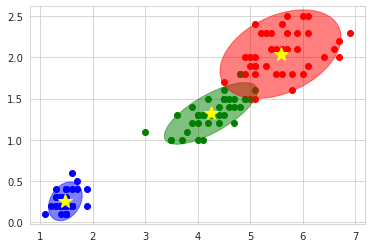

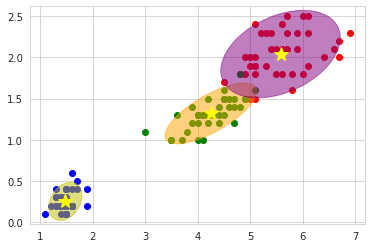

In [ ]:
view2= X_train
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(view2[y_train=='Iris-setosa'].iloc[:,0], view2[y_train=='Iris-setosa'].iloc[:,1], c='b', label='0')
splot.scatter(view2[y_train=='Iris-virginica'].iloc[:,0], view2[y_train=='Iris-virginica'].iloc[:,1], c='r', label='0')
splot.scatter(view2[y_train=='Iris-versicolor'].iloc[:,0], view2[y_train=='Iris-versicolor'].iloc[:,1], c='g', label='0')

plot_ellipse(splot, mean1, cov1, 'b')
plot_ellipse(splot, mean2, cov2, 'g')
plot_ellipse(splot, mean3, cov3, 'r')
plt.show()


plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(view2[y_train=='Iris-setosa'].iloc[:,0], view2[y_train=='Iris-setosa'].iloc[:,1], c='b', label='0')
splot.scatter(view2[y_train=='Iris-virginica'].iloc[:,0], view2[y_train=='Iris-virginica'].iloc[:,1], c='r', label='0')
splot.scatter(view2[y_train=='Iris-versicolor'].iloc[:,0], view2[y_train=='Iris-versicolor'].iloc[:,1], c='g', label='0')

plot_ellipse(splot, mle_m1, mle_c1, 'y')
plot_ellipse(splot, mle_m2, mle_c2, 'orange')
plot_ellipse(splot, mle_m3, mle_c3, 'purple')
plt.show()

##Subpart E: Testing

In [ ]:
y_pred= predic(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


#Question 3

##Subpart A: Calculating Likelihoods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data  = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/train.data", header=None, sep=' ')
test_data   = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/test.data", header=None, sep=' ')
train_label = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/train.label", header=None, sep=' ')
test_label  = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/test.label", header=None, sep=' ')
test_map    = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/test.map", header=None, sep=' ')
vocabulary  = pd.read_csv("https://raw.githubusercontent.com/Ishaanshri95/datasets/main/data/vocabulary.txt", header=None, sep=' ')

train_data.columns = ['doc_id', 'term_id', 'count']
test_data.columns  =  ['doc_id', 'term_id', 'count']
train_label.columns = ['class']       
test_label.columns = ['class']
test_map.columns = ['class_desc', 'class']
vocabulary.columns = ['term']


In [ ]:
test_label['class']  = test_label['class'] - 1
train_label['class']  = train_label['class'] -1

test_map['class'] = test_map['class']-1

train_data['doc_id'] = train_data['doc_id'] -1
test_data['doc_id'] = test_data['doc_id'] -1

train_data['term_id'] = train_data['term_id'] -1
test_data['term_id'] = test_data['term_id'] -1

In [ ]:
train_data_labels = np.array([train_label['class'][doc_id] for doc_id in train_data['doc_id']])
priors = [np.sum( train_label['class'] == class_label) / train_label.shape[0] for class_label in range(20)]
print(np.sum(priors))


1.0


In [ ]:
train_data_labels = np.array([train_label['class'][doc_id] for doc_id in train_data['doc_id']])

list_of_term_ids = list(vocabulary.index)
likelihood = [[0 for class_label in range(20)] for term_id in list_of_term_ids]

In [ ]:
for class_label in range(20):
  train_data_slice = train_data[train_data_labels == class_label]
  print(train_data_slice.shape)
  for term_id in list_of_term_ids:
    likelihood[term_id][class_label] = np.sum(train_data_slice[train_data_slice['term_id'] == term_id]['count']) 

likelihood=np.array(likelihood, dtype='float64')
sums=np.transpose(np.sum(likelihood, axis=0))
likelihood=likelihood/sums
    
# likelihood = [[(    np.sum(train_data[(train_data_labels == class_label) * (train_data['term_id'] == term_id)]['count']) / np.sum( train_label['class'] == class_label)   )  for class_label in range(1)] for term_id in list_of_term_ids[:100]]


print(np.sum(likelihood == 0))

(72978, 3)
(58472, 3)
(54823, 3)
(57672, 3)
(53114, 3)
(68372, 3)
(42276, 3)
(69306, 3)
(66522, 3)
(65481, 3)
(77092, 3)
(99723, 3)
(61448, 3)
(85406, 3)
(84325, 3)
(100607, 3)
(92589, 3)
(113328, 3)
(84240, 3)
(59571, 3)
1022982


##Subpart B: Laplace smoothing

In [ ]:
print(np.sum(likelihood==0))
print(len(likelihood)*20)

1022982
1223760


In [ ]:
alpha=0.00001

train_data_labels = np.array([train_label['class'][doc_id] for doc_id in train_data['doc_id']])

list_of_term_ids = list(vocabulary.index)
L_likelihood = [[0 for class_label in range(20)] for term_id in list_of_term_ids]

for class_label in range(20):
  train_data_slice = train_data[train_data_labels == class_label]
  print(train_data_slice.shape)
  for term_id in list_of_term_ids:
    L_likelihood[term_id][class_label] = alpha+ np.sum(train_data_slice[train_data_slice['term_id'] == term_id]['count']) 

L_likelihood=np.array(likelihood, dtype='float64')
sums=np.transpose(np.sum(likelihood, axis=0))
sums+=20*alpha
L_likelihood/=sums
    
# likelihood = [[(    np.sum(train_data[(train_data_labels == class_label) * (train_data['term_id'] == term_id)]['count']) / np.sum( train_label['class'] == class_label)   )  for class_label in range(1)] for term_id in list_of_term_ids[:100]]


np.sum(L_likelihood == 0)

(72978, 3)
(58472, 3)
(54823, 3)
(57672, 3)
(53114, 3)
(68372, 3)
(42276, 3)
(69306, 3)
(66522, 3)
(65481, 3)
(77092, 3)
(99723, 3)
(61448, 3)
(85406, 3)
(84325, 3)
(100607, 3)
(92589, 3)
(113328, 3)
(84240, 3)
(59571, 3)


1022982

In [ ]:
evidence=[]
for i in likelihood:
  evidence.append( np.sum(np.array(i)*np.array(priors) ))

##Subpart C: naiveBayesClassify(trainData, trainLabels, testData)

In [ ]:
def NBClassify(trainData, trainLabels, testData):
  y_pred=[]
  doc_ids= list(np.unique(testData['doc_id']))
  for doc_id in doc_ids:
    p=priors.copy()
    doc=testData[testData['doc_id']==doc_id]
    for index in doc.index:
      for c in range(20):
        # print(testData.iloc[i, :])
        p[c]*=(L_likelihood[testData.iloc[index,1]][c])**(testData.iloc[index,2])
    y_pred.append(np.argmax(p))
  return y_pred


In [ ]:
y_pred= NBClassify(train_data, train_label, test_data)


In [ ]:
a=0
c=0
y_test= list(test_label['class'])

for i in range(len(y_pred)):
  if y_pred[i]!=0:
    c+=1
    if y_pred[i]==y_test[i]:
      a+=1
print(a/c)

0.7083333333333334
